In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # type: ignore
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline


In [2]:
import os 
import glob

In [3]:
path = r'C:\Users\Gilbert\Desktop\hd\heart+disease'
csv_files = glob.glob(os.path.join(path, '*.csv'))
csv_files

['C:\\Users\\Gilbert\\Desktop\\hd\\heart+disease\\EDAHD.csv',
 'C:\\Users\\Gilbert\\Desktop\\hd\\heart+disease\\heart.csv',
 'C:\\Users\\Gilbert\\Desktop\\hd\\heart+disease\\modelHD.csv']

In [4]:
# Read  csv file
df = pd.read_csv('C:\\Users\\Gilbert\\Desktop\\hd\\heart+disease\\EDAHD.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


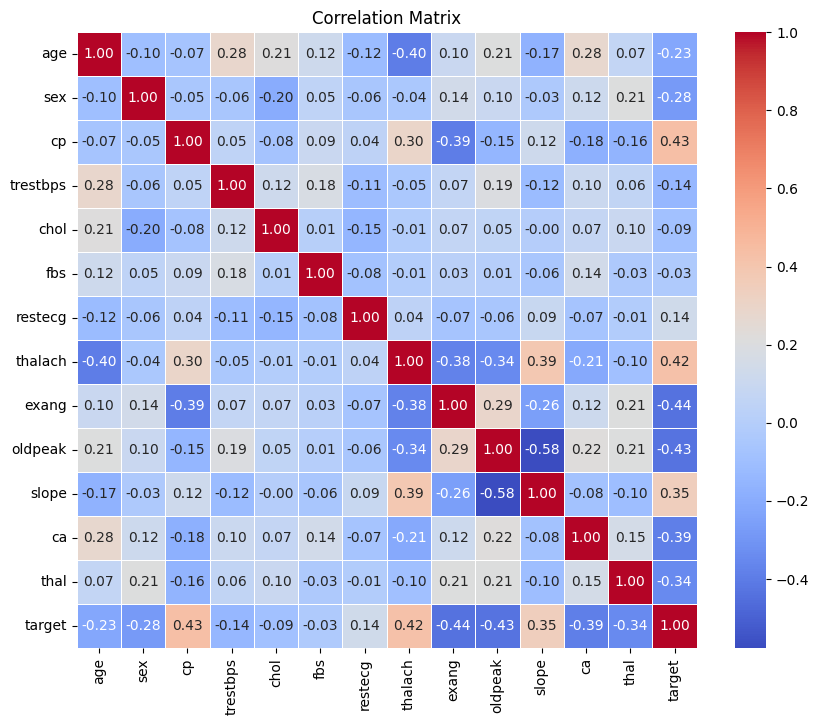

In [6]:
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# creating a pipeline

In [8]:
# defining numerical and categorical variables
numerical_features =  ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
#defining preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])
#combining preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])
#create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


# splitting the dataset into training and testing sets

In [9]:
X = df.drop(columns=['target'])
y= df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

## An evaluate function to give all metrics after model training

In [11]:
# Check the data type and unique values of the target variable y
print("Unique values in y:", y.unique())

# Define the models 
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),

}

model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)

    print(name)
    model_list.append(name)

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Recall: {:.4f}".format(recall))
    print("- F1-score: {:.4f}".format(f1))
    print("- ROC-AUC Score: {:.4f}".format(roc_auc))
    print('=' * 35)
    print('\n')

    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)


Unique values in y: [1 0]
Logistic Regression
Model performance for Test set
- Accuracy: 0.8852
- Precision: 0.8788
- Recall: 0.9062
- F1-score: 0.8923
- ROC-AUC Score: 0.8842


K-Neighbors Classifier
Model performance for Test set
- Accuracy: 0.6885
- Precision: 0.6857
- Recall: 0.7500
- F1-score: 0.7164
- ROC-AUC Score: 0.6853


Decision Tree
Model performance for Test set
- Accuracy: 0.8361
- Precision: 0.9231
- Recall: 0.7500
- F1-score: 0.8276
- ROC-AUC Score: 0.8405


Random Forest Classifier
Model performance for Test set
- Accuracy: 0.8361
- Precision: 0.8438
- Recall: 0.8438
- F1-score: 0.8438
- ROC-AUC Score: 0.8357




## Insights:
    ~F1-score provides a balance between recall and precision and gives a single metric to assess model performance.
    
    ~Logistic regression model shows overall good performance on the test set,  with high accuracy, precision, recall, F1-score and ROC-AUC curve.
    
   

## perform cross validation to ensure the model is not overfitting the data

In [12]:
from sklearn.model_selection import cross_val_score

# Define the Logistic Regression model
model = LogisticRegression()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)


Cross-Validation Scores: [0.83606557 0.86885246 0.85245902 0.85       0.75      ]
Mean Cross-Validation Score: 0.8314754098360655
Standard Deviation of Cross-Validation Scores: 0.04204718302865231


## Insights:
    ~ The score ranges from 75% to 86.89%
    ~ Mean cross-validation score gives an overall estimate of the model performance and is about 82.49% 
    ~ SD of cross-validation scores indicates c-v spread around the mean and a low SD indicates the models performance is consistent across different folds.

In [13]:
# Define the K-Nearest Neighbor model
model =  KNeighborsClassifier()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)

Cross-Validation Scores: [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Mean Cross-Validation Score: 0.643879781420765
Standard Deviation of Cross-Validation Scores: 0.053829879683394935


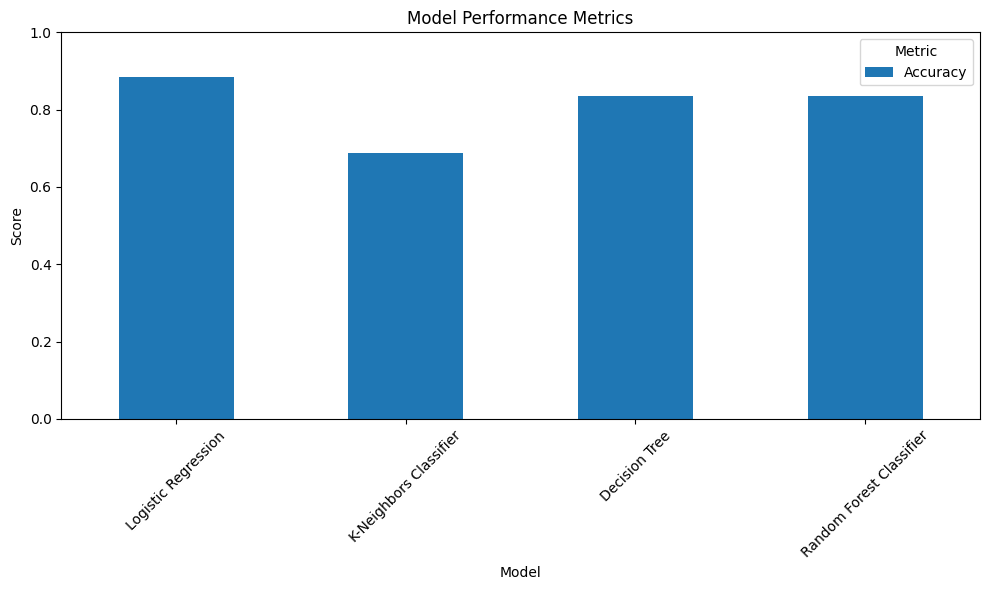

In [14]:
performance_df = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    
})

performance_df.set_index('Model', inplace=True)

performance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [15]:
df.to_csv('ModelHD.csv', index=False)

In [16]:
#I now want to download this "modelHD" as a csv file
from IPython.display import FileLink

# Generate a link to download the CSV file
FileLink("modelHD.csv")


c:\Users\Gilbert\Desktop\hd\heart+disease\modelHD.csv